In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime

from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle

In [2]:
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling1D, GaussianNoise, Conv1D, MaxPool1D, GlobalMaxPooling1D
from keras.layers import Input, concatenate, SpatialDropout1D, Flatten, AvgPool1D, LSTM, Lambda, Reshape, GaussianDropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD, Nadam
import keras.backend as K
from keras.regularizers import l1, l2 , l1_l2


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Data loading

In [3]:
tick_bars = pd.read_csv('tick_bars.csv')
time_bars = pd.read_csv('time_bars.csv')

# Making features

In [4]:
from statsmodels.tsa.stattools import adfuller
import nolds

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
from scipy.stats import entropy
from scipy import stats

In [8]:
# tick_bars['pct_change'] = np.clip(tick_bars.close.pct_change(), -H, H)
# tick_bars['pct_change_horizon'] = np.clip(tick_bars.close.pct_change(HORIZON), -H, H)
# tick_bars['vol_change_horizon'] = np.clip(tick_bars.volume.pct_change(WINDOW), -H, H)

# tick_bars['rolling_skew'] = tick_bars['pct_change'].rolling(window = WINDOW).skew()
# tick_bars['rolling_kurt'] = tick_bars['pct_change'].rolling(window = WINDOW).kurt()
# tick_bars['rolling_std'] = tick_bars['pct_change'].rolling(window = WINDOW).std()

# tick_bars['rolling_corr'] = tick_bars['pct_change'].rolling(window = WINDOW).corr(tick_bars.close.shift(1))
# tick_bars['rolling_close_volume_corr'] = tick_bars.close.rolling(window = WINDOW).corr(tick_bars.volume)
# tick_bars['rolling_close_open_corr'] = tick_bars.close.rolling(window = WINDOW).corr(tick_bars.open)

# tick_bars['rolling_shapiro'] = tick_bars['pct_change'].rolling(window = WINDOW).apply(lambda x: stats.shapiro(x)[0])
# tick_bars['rolling_adfuller'] = tick_bars['pct_change'].rolling(window = WINDOW).apply(lambda x: adfuller(x)[0])
# tick_bars['rolling_hurst'] = tick_bars.close.rolling(window = WINDOW).apply(lambda x: nolds.hurst_rs(x))

# tick_bars['rolling_lyapunov'] = tick_bars.close.rolling(window = WINDOW).apply(lambda x: nolds.lyap_r(x))
# tick_bars['rolling_dfa'] = tick_bars.close.rolling(window = WINDOW).apply(lambda x: nolds.dfa(x))
# tick_bars['rolling_entropy'] = tick_bars['pct_change'].apply(abs).rolling(window = WINDOW).apply(entropy)

In [200]:
WINDOW_LONG = 200
WINDOW_SHORT = 50
HORIZON = 50

In [201]:
sma_long = tick_bars.close.rolling(WINDOW_LONG).kurt()
sma_short = tick_bars.close.rolling(WINDOW_SHORT).kurt()

In [202]:
signal = np.where(sma_short > sma_long, 1.0, 0.0)

In [203]:
signal = np.diff(signal)

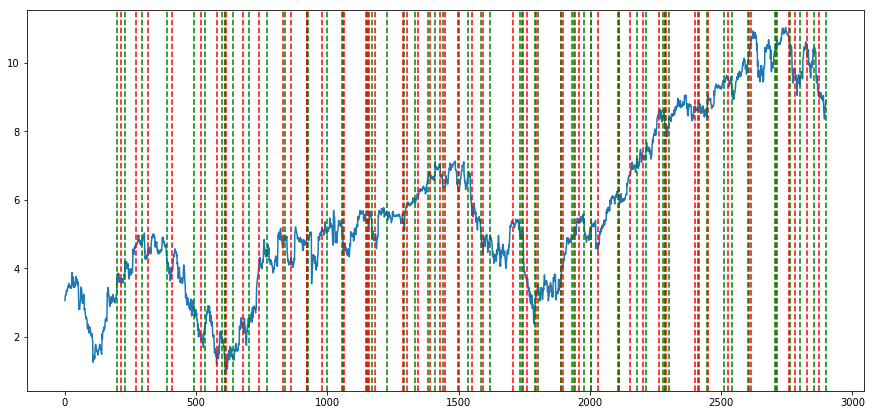

In [204]:
N = 2900

plt.figure(figsize = (15, 7))
plt.plot(tick_bars.close[:N] - 48)
# plt.plot(sma_long[:N])
# plt.plot(sma_short[:N])

for i, s in enumerate(signal[:N]):
    if s == 1:
        plt.axvline(i, color = 'green', ls = '--')
    elif s == -1:
        plt.axvline(i, color = 'red', ls = '--')

plt.show()